In [1]:
include("contingency_tables.jl")
using ProgressMeter, Dates, Plots, Statistics
Random.seed!(2025)

TaskLocalRNG()

In [2]:
T1 = [68   20    15     5;
    119   84    54    29;
    26   17    14    14;
    7   94    10    16]

T2 = [2161 3577 2184 1636;
    2755 5081 2222 1052;
    936 1753 640 306;
    225 419 96 38;
    39 98 31 14]

n1 = sum(T1)
n2 = sum(T2)
d = log2(n2)-log2(n1)

5.415284984325888

In [3]:
K = 15
K0 = 8
ks = K0:K
reps = 10000
times = zeros(Real, length(ks))
ns = zeros(Int, length(ks))

for i in 1:length(ks)
    T = T1 .* 2^ks[i]
    ns[i] = sum(T)
    start = now()
    for _ in 1:reps
        T = lumped_burnside_step(T)
    end
    finish = now()
    times[i] = (finish - start).value / 1e3  # Convert to seconds

    println("Run ", i, " of ", length(ks),". Time: ", times[i])
end


times_2 = zeros(Real, length(ks))
ns_2 = zeros(Int, length(ks))

for i in 1:length(ks)
    T = T2 .* Int(floor(2^(ks[i]-d)))
    ns_2[i] = sum(T)
    start = now()
    for _ in 1:reps
        T = lumped_burnside_step(T)
    end
    finish = now()
    times_2[i] = (finish - start).value / 1e3  # Convert to seconds

    println("Run ", i, " of ", length(ks),". Time: ", times_2[i])
end

Run 1 of 8. Time: 12.728
Run 2 of 8. Time: 13.328
Run 3 of 8. Time: 14.832
Run 4 of 8. Time: 16.109
Run 5 of 8. Time: 18.109
Run 6 of 8. Time: 19.574
Run 7 of 8. Time: 21.71
Run 8 of 8. Time: 22.617
Run 1 of 8. Time: 15.784
Run 2 of 8. Time: 18.175
Run 3 of 8. Time: 20.608
Run 4 of 8. Time: 22.7
Run 5 of 8. Time: 25.265
Run 6 of 8. Time: 29.024
Run 7 of 8. Time: 31.209
Run 8 of 8. Time: 33.41


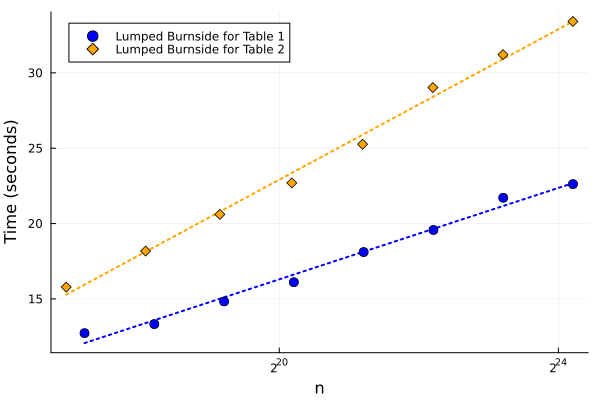

In [5]:
x1 = log2.(ns)
x2 = log2.(ns_2)
y1 = times
y2 = times_2
b1 = cov(x1,y1)/var(x1)
b2 = cov(x2,y2)/var(x2)
a1 = mean(y1) - mean(x1)*b1
a2 = mean(y2) - mean(x2)*b2

fit1 = b1 .* x1 .+ a1
fit2 = b2 .* x2 .+ a2

plot(ns, fit1, label = nothing, lw = 2, linestyle = :dot, color =:blue, xscale =:log2, legend =:topleft)
plot!(ns_2, fit2, label = nothing, lw = 2, linestyle = :dot, color =:orange)

scatter!(ns, times, label = "Lumped Burnside for Table 1", marker = (:circle, 5), color = :blue)
scatter!(ns_2, times_2, label = "Lumped Burnside for Table 2", marker = (:diamond, 5), color = :orange)

xlabel!("n")
ylabel!("Time (seconds)")